In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sn

# Load the breast cancer dataset
data = load_breast_cancer()

# Extract the feature matrix (X) and target labels (y)
X = data.data
y = data.target

In [2]:
data_df = pd.DataFrame(data = data.data, columns = data.feature_names)
data_df.head().T
#print(data.DESCR) 

# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Show the first five rows
df.head()
#df.info()
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


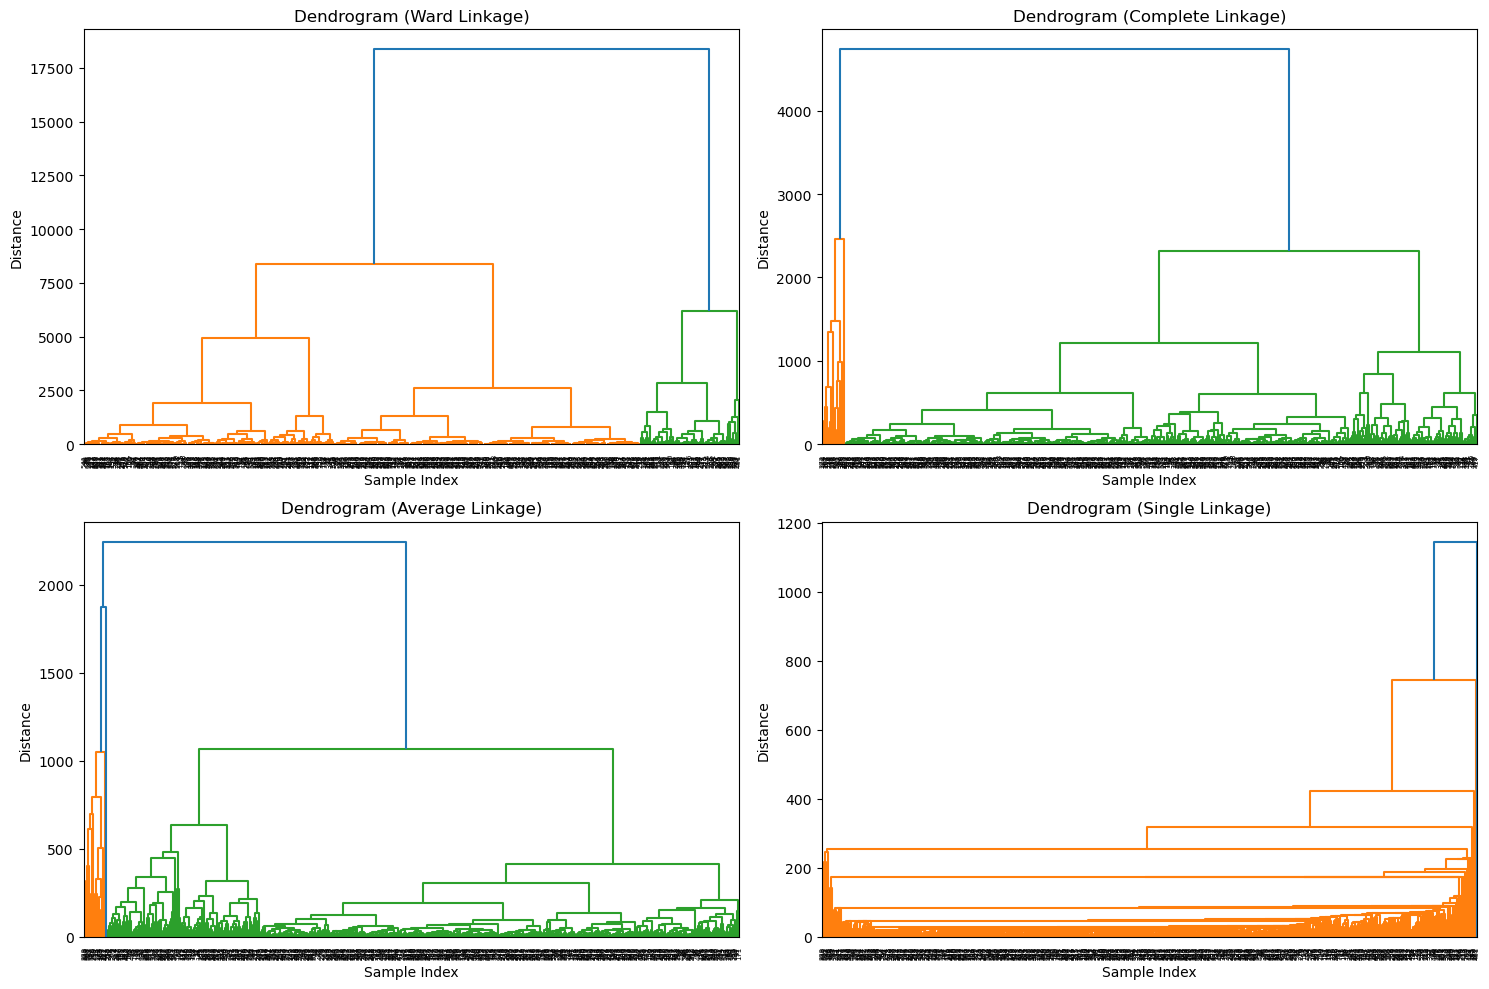

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pylab as plt

# Define linkage criteria in the Ward, Maximum or complete linkage, Average linkage, Single linkage
linkage_criteria = ['ward', 'complete', 'average', 'single']

# Create a figure to display dendrograms
plt.figure(figsize=(15, 10))

# Perform hierarchical clustering for 'ward' linkage
Z_ward = linkage(df, method='ward')

# Plot the dendrogram for 'ward' linkage
plt.subplot(2, 2, 1)
dendrogram(Z_ward, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

# Perform hierarchical clustering for 'complete' linkage
Z_complete = linkage(df, method='complete')

# Plot the dendrogram for 'complete' linkage
plt.subplot(2, 2, 2)
dendrogram(Z_complete, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

# Perform hierarchical clustering for 'average' linkage
Z_average = linkage(df, method='average')

# Plot the dendrogram for 'average' linkage
plt.subplot(2, 2, 3)
dendrogram(Z_average, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

# Perform hierarchical clustering for 'single' linkage
Z_single = linkage(df, method='single')

# Plot the dendrogram for 'single' linkage
plt.subplot(2, 2, 4)
dendrogram(Z_single, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

# Adjust subplot layout
plt.tight_layout()

# Show all dendrograms
plt.show()


(A) Apply Hierarchical Clustering with different linkage criteria (Ward, Maximum or complete linkage, Average linkage, Single linkage) and discuss the results obtained.

When looking at the 4 different linkages applied to the breast cancer data, it seems that the ward linkage is the most balanced of the 4.  When looking at the single linkage, it is very unbalanced  and shows elongated clusters.  Depending on the objective of the clusterting analysis, the linkage should be choosen specifically for that analysis.

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

pd_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Create a 'target' column and populate it with data from breast_cancer.target
pd_breast_cancer['target'] = breast_cancer.target

pd_breast_cancer.info()
pd_breast_cancer.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,0
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,1
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,1
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,1


In [5]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pd_breast_cancer, breast_cancer.target, test_size=0.20, random_state=42)

C:\Users\George\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\George\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clustering Accuracy without PCA: 0.12280701754385964


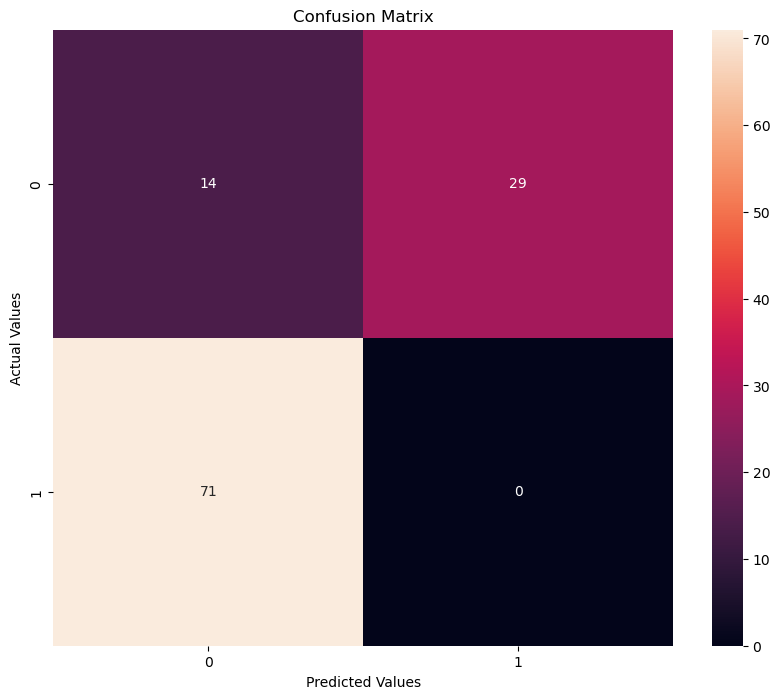

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

# Set a random seed for reproducibility
seed = 42

# Initialize the KMeans classifier with 2 clusters
classifier = KMeans(n_clusters=2, random_state=seed)

# Fit the KMeans model to the training data (X_train)
k_means = classifier.fit(X_train)

# Predict the cluster labels for the test data (X_test)
y_kmeans = k_means.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_kmeans)

# Calculate and display the clustering accuracy (accuracy_score)
accuracy = accuracy_score(y_test, y_kmeans)
print("Clustering Accuracy without PCA:", accuracy)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

y_kmeans

C:\Users\George\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\George\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clustering Accuracy with PCA: 0.14035087719298245


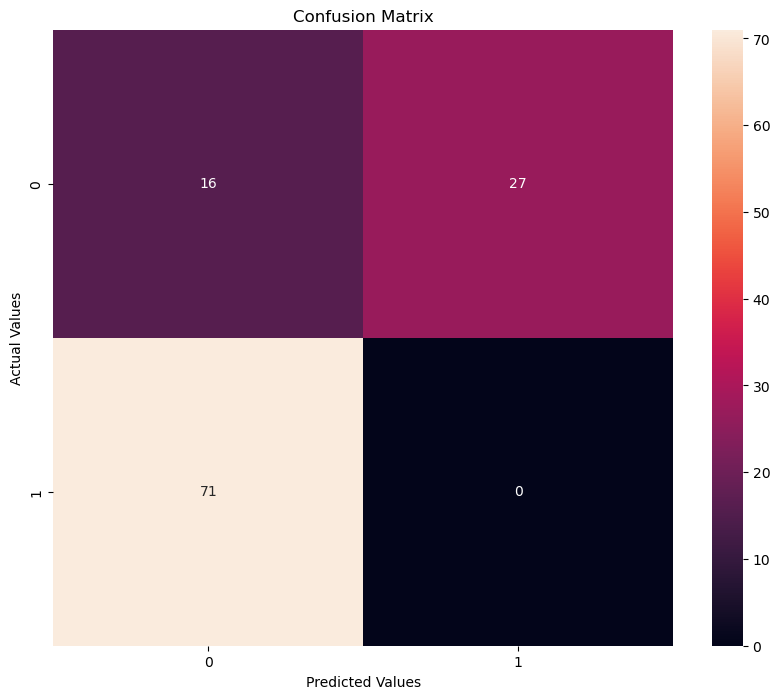

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1])

In [8]:
from sklearn.decomposition import PCA

# Perform PCA with 95% variance ratio
pca = PCA(n_components=0.95)  # Preserve 95% of the variance
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.fit_transform(X_test) 

# Initialize KMeans classifier with 2 clusters
classifier = KMeans(n_clusters=2, random_state=42)

# Fit KMeans model on PCA-reduced training data
k_means_PCA = classifier.fit(pca_X_train)

# Predict cluster labels for PCA-reduced test data
y_kmeans_PCA = k_means_PCA.predict(pca_X_test)

# Calculate confusion matrix
#cm2 = confusion_matrix(y_test, y_kmeans_PCA)
cm2 = confusion_matrix(y_test, k_means_PCA.predict(pca_X_test))

# Calculate and display clustering accuracy
accuracy_PCA = accuracy_score(y_test, y_kmeans_PCA)
print("Clustering Accuracy with PCA:", accuracy_PCA)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

y_kmeans_PCA

PCA is a data preprocessing technique that transforms the input data to reduce dimensionality, improve computational efficiency, and potentially enhance the model's performance, but it doesnt involve modifying an existing model.

One of the primary purposes of PCA is dimensionality reduction. If you have a high-dimensional dataset with many features, K-Means can become computationally expensive and prone to overfitting. PCA helps reduce the number of features while preserving as much of the original variance as possible, making K-Means more efficient and effective.

(b) Apply the k-Means clustering algorithm with parameters
optimization and evaluate the performance, discuss the
results obtained.

The results show that there was a small increase, about 2% accuracy with PCA applied during preprocessing.